# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [10]:
#Starter Code

def get_song_links(artist_url):
    url = artist_url #Put the URL of your AZLyrics Artist Page here!

    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing


    #The example from our lecture/reading
    data = [] #Create a storage container
    
    albums = soup.find_all('div', class_='album')
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
#     data[:2]
    return data

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [11]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!
from bs4 import BeautifulSoup
import requests

#Example page
url = 'https://www.azlyrics.com/lyrics/badreligion/generator.html'

html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify()[:1000]

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="Lyrics to &quot;Generator&quot; song by Bad Religion: Like a rock Like a planet Like a fucking atom bomb I\'ll remain unperturbed By the joy and the madnes..." name="description"/>\n  <meta content="Generator lyrics, Bad Religion Generator lyrics, Bad Religion lyrics" name="keywords"/>\n  <meta content="noarchive" name="robots"/>\n  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>\n  <title>\n   Bad Religion - Generator Lyrics | AZLyrics.com\n  </title>\n  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>\n  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>\n  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->\n  <!--[if lt IE 9]>\r\n<script src="http

In [13]:
def scrape_lyrics(song_page_url):
    
    html_page = requests.get(song_page_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {"class": "container main-page"})
    main_l2 = main_page.find('div', {"class" : "row"})
    main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})
    lyrics = main_l3.findAll('div')[6].text
    
    return lyrics


## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [12]:
#Use this block for your code!
songs = get_song_links('https://www.azlyrics.com/b/badreligion.html')
print(len(songs))
print(songs[0])

296
('Bad Religion (Theme Song)', '../lyrics/badreligion/badreligionthemesong.html', 'album: "Bad Religion" (1981)')


In [18]:
url_base = 'http://www.azlyrics.com'

lyrics = []
for song in songs:
    try:
        url = url_base + song[1].replace('..', '')
        lyric = scrape_lyrics(url)
        lyrics.append(lyric)
    except:
        lyrics.append('n/a')

In [19]:
print(len(songs), len(lyrics))

296 296


## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [20]:
#Use this block for your code!
import pandas as pd

df = pd.DataFrame(list(zip(songs, lyrics)))
df.head()

,0,1
0,"(Bad Religion (Theme Song), ../lyrics/badrelig...","\n\r\nSee my body, it's nothing to get hung ab..."
1,"(Politics, ../lyrics/badreligion/politics.html...","\n\r\nEconomy, technology, does it really work..."
2,"(Sensory Overload, ../lyrics/badreligion/senso...","\n\r\nThey're all just suicides, in a social w..."
3,"(Slaves, ../lyrics/badreligion/slaves.html, al...",\n\r\nCongress runs your daily life\r\nThey br...
4,"(Drastic Actions, ../lyrics/badreligion/drasti...","\n\r\nHeard a word, suicide,\r\nNot from one, ..."


In [23]:
df['song'] = df[0].map(lambda x: x[0])
df['song_url'] = df[0].map(lambda x: x[1])
df['albume'] = df[0].map(lambda x: x[2])

df = df.rename(columns={1:'Lyrics'})
df.head()

,0,Lyrics,song,song_url,albume
0,"(Bad Religion (Theme Song), ../lyrics/badrelig...","\n\r\nSee my body, it's nothing to get hung ab...",Bad Religion (Theme Song),../lyrics/badreligion/badreligionthemesong.html,"album: ""Bad Religion"" (1981)"
1,"(Politics, ../lyrics/badreligion/politics.html...","\n\r\nEconomy, technology, does it really work...",Politics,../lyrics/badreligion/politics.html,"album: ""Bad Religion"" (1981)"
2,"(Sensory Overload, ../lyrics/badreligion/senso...","\n\r\nThey're all just suicides, in a social w...",Sensory Overload,../lyrics/badreligion/sensoryoverload.html,"album: ""Bad Religion"" (1981)"
3,"(Slaves, ../lyrics/badreligion/slaves.html, al...",\n\r\nCongress runs your daily life\r\nThey br...,Slaves,../lyrics/badreligion/slaves.html,"album: ""Bad Religion"" (1981)"
4,"(Drastic Actions, ../lyrics/badreligion/drasti...","\n\r\nHeard a word, suicide,\r\nNot from one, ...",Drastic Actions,../lyrics/badreligion/drasticactions.html,"album: ""Bad Religion"" (1981)"


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]


Bad            9
Religion,      7
it's           5
you            4
a              4
is             4
your           4
Indecision,    3
regurgitate    3
Don't          3
dtype: int64

Text(0.5, 1.0, 'Top 10 Lyrics for Politics')

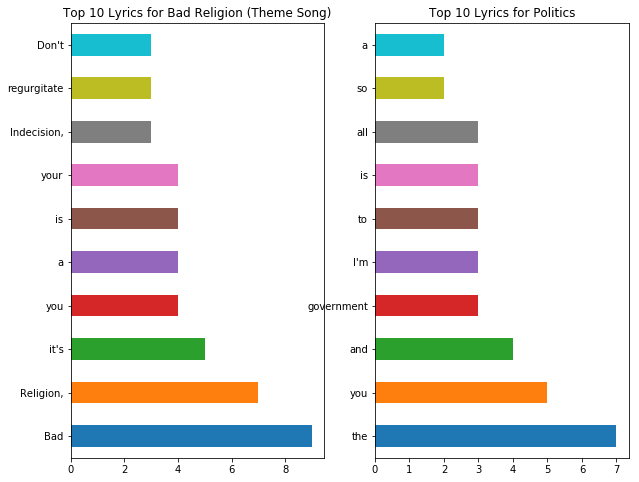

In [26]:
fig, axes = plt.subplots(1,2, figsize=(10,8))

#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]

#Plot as bar graph
top10.plot(ax=axes[0], kind='barh')

#Add Subplot Title
axes[0].set_title('Top 10 Lyrics for {}'.format(df['song'].iloc[0]))

#Repeat
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:10]

#Plot as bar graph
top10.plot(ax=axes[1], kind='barh')

#Add Subplot Title
axes[1].set_title('Top 10 Lyrics for {}'.format(df['song'].iloc[1]))

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!